# Comparação de Modelos de Regressão Logística para Diagnóstico de Câncer de Mama

**Contexto:** O diagnóstico precoce do câncer de mama é fundamental para aumentar as chances de tratamento eficaz.

**Objetivo:** desenvolver e comparar modelos de Regressão Logística aplicados a dados clínicos, avaliando o impacto da seleção de atributos no desempenho do modelo.

## Descrição do Dataset

O dataset utilizado é o **Breast Cancer Wisconsin (Diagnostic)**, disponibilizado pela biblioteca Scikit-learn.

Ele contém características extraídas de imagens digitalizadas de biópsias de mama, associadas a diagnósticos benignos ou malignos.

## Análise Exploratória Inicial

Nesta etapa, foi realizada uma análise inicial para compreender a distribuição das variáveis e sua relação com o diagnóstico.

## Modelos de Regressão Logística

Foram desenvolvidos dois modelos:

- **Modelo Baseline:** utilizando apenas as duas features mais correlacionadas com o diagnóstico
- **Modelo Aprimorado:** utilizando um conjunto mais amplo de variáveis

## Avaliação e Comparação dos Modelos

Os modelos foram avaliados por meio de métricas de classificação, permitindo quantificar o ganho de desempenho obtido com a inclusão de mais informações.

#Etapa 1: Análise Exploratória de Dados (AED)

Carregamento e Visão Geral:
Foram importadas as bibliotecas necessárias.

In [ ]:
# Importar bibliotecas principais
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer


O dataset foi carregado o dataset (load_breast_cancer(as_frame=True)) em df_cancer.

In [ ]:
# Carregar o dataset diretamente como DataFrame
df_cancer = load_breast_cancer(as_frame=True)

# O dataset vem em um dicionário, então vamos acessar o DataFrame completo:
df_cancer = df_cancer.frame


Exibindo as dimensões, .head(10), .info() e verificando valores ausentes (.isnull().sum())

In [ ]:
# Dimensões (linhas, colunas)
print("Dimensões do DataFrame:", df_cancer.shape)

# Visualizar as 10 primeiras linhas
print("\nVisualização das 10 primeiras linhas:")
print(df_cancer.head(10))

# Informações gerais
print("\nInformações do DataFrame:")
print(df_cancer.info())

# Verificar valores ausentes
print("\nValores ausentes por coluna:")
print(df_cancer.isnull().sum())


Dimensões do DataFrame: (569, 31)

Visualização das 10 primeiras linhas:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   
7        13.71         20.83           90.20      577.9          0.11890   
8        13.00         21.82           87.50      519.8          0.12730   
9        12.46         24.04           83.97      475.9          0.11860   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.2

#2. Análise Descritiva da Variável-Alvo

Usei .value_counts() para ver a quantidade de cada classe (benigno/maligno). E verifiquei se o dataset esta balanceado.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contagem das classes
print("Distribuição da variável alvo (target):")
print(df_cancer["target"].value_counts())

# Percentual de cada classe
print("\nPercentual por classe:")
print(df_cancer["target"].value_counts(normalize=True) * 100)


Distribuição da variável alvo (target):
target
1    357
0    212
Name: count, dtype: int64

Percentual por classe:
target
1    62.741652
0    37.258348
Name: proportion, dtype: float64


Foi gerado um gráfico de contagem (countplot) para visualizar a distribuição da variável alvo.

/tmp/ipython-input-3905598681.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df_cancer, palette="coolwarm")


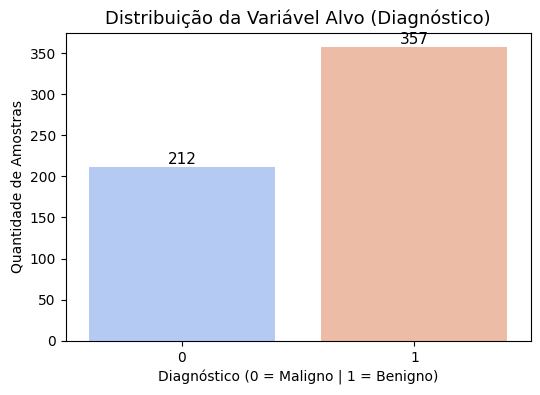

In [ ]:
# Gráfico de contagem da variável-alvo
plt.figure(figsize=(6,4))
sns.countplot(x="target", data=df_cancer, palette="coolwarm")

# Rótulos e título
plt.title("Distribuição da Variável Alvo (Diagnóstico)", fontsize=13)
plt.xlabel("Diagnóstico (0 = Maligno | 1 = Benigno)")
plt.ylabel("Quantidade de Amostras")

# Mostrar valores acima das barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=11)

plt.show()


Análise Univariada de Features Numéricas:

Utilizei o método .describe() para obter um resumo estatístico das features
numéricas.

In [ ]:
print("Resumo estatístico das features numéricas:\n")
print(df_cancer.describe())

Resumo estatístico das features numéricas:

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380      

Escolhi 3 features numéricas e plotei histogramas para visualizar suas distribuições individuais.

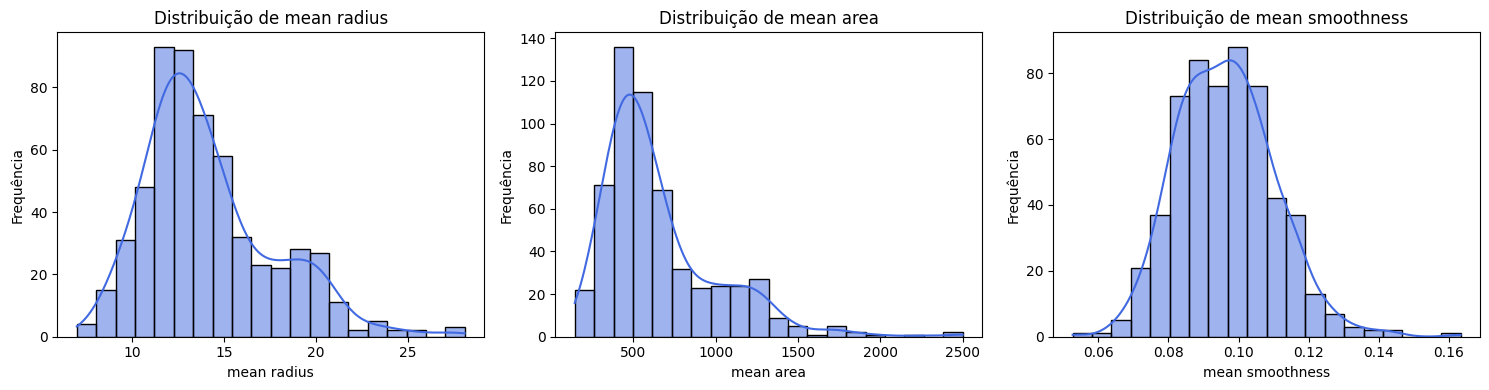

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de features escolhidas
features = ["mean radius", "mean area", "mean smoothness"]

# Tamanho do gráfico
plt.figure(figsize=(15,4))

# Loop para gerar um histograma para cada feature
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.histplot(df_cancer[col], bins=20, kde=True, color='royalblue')
    plt.title(f"Distribuição de {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")

plt.tight_layout()
plt.show()


4. Análise de Correlação:

Foi calculada a matriz de correlação entre todas as features e a variável alvo (target).

In [ ]:
# Calculando a matriz de correlação
corr_matrix = df_cancer.corr(numeric_only=True)

# Exibindo as 10 features mais correlacionadas com o target
corr_target = corr_matrix["target"].sort_values(ascending=False)
print("Correlação das variáveis com o target:\n")
print(corr_target.head(10))


Correlação das variáveis com o target:

target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
Name: target, dtype: float64


Montei um heatmap dessa matriz de correlação para facilitar a visualização.

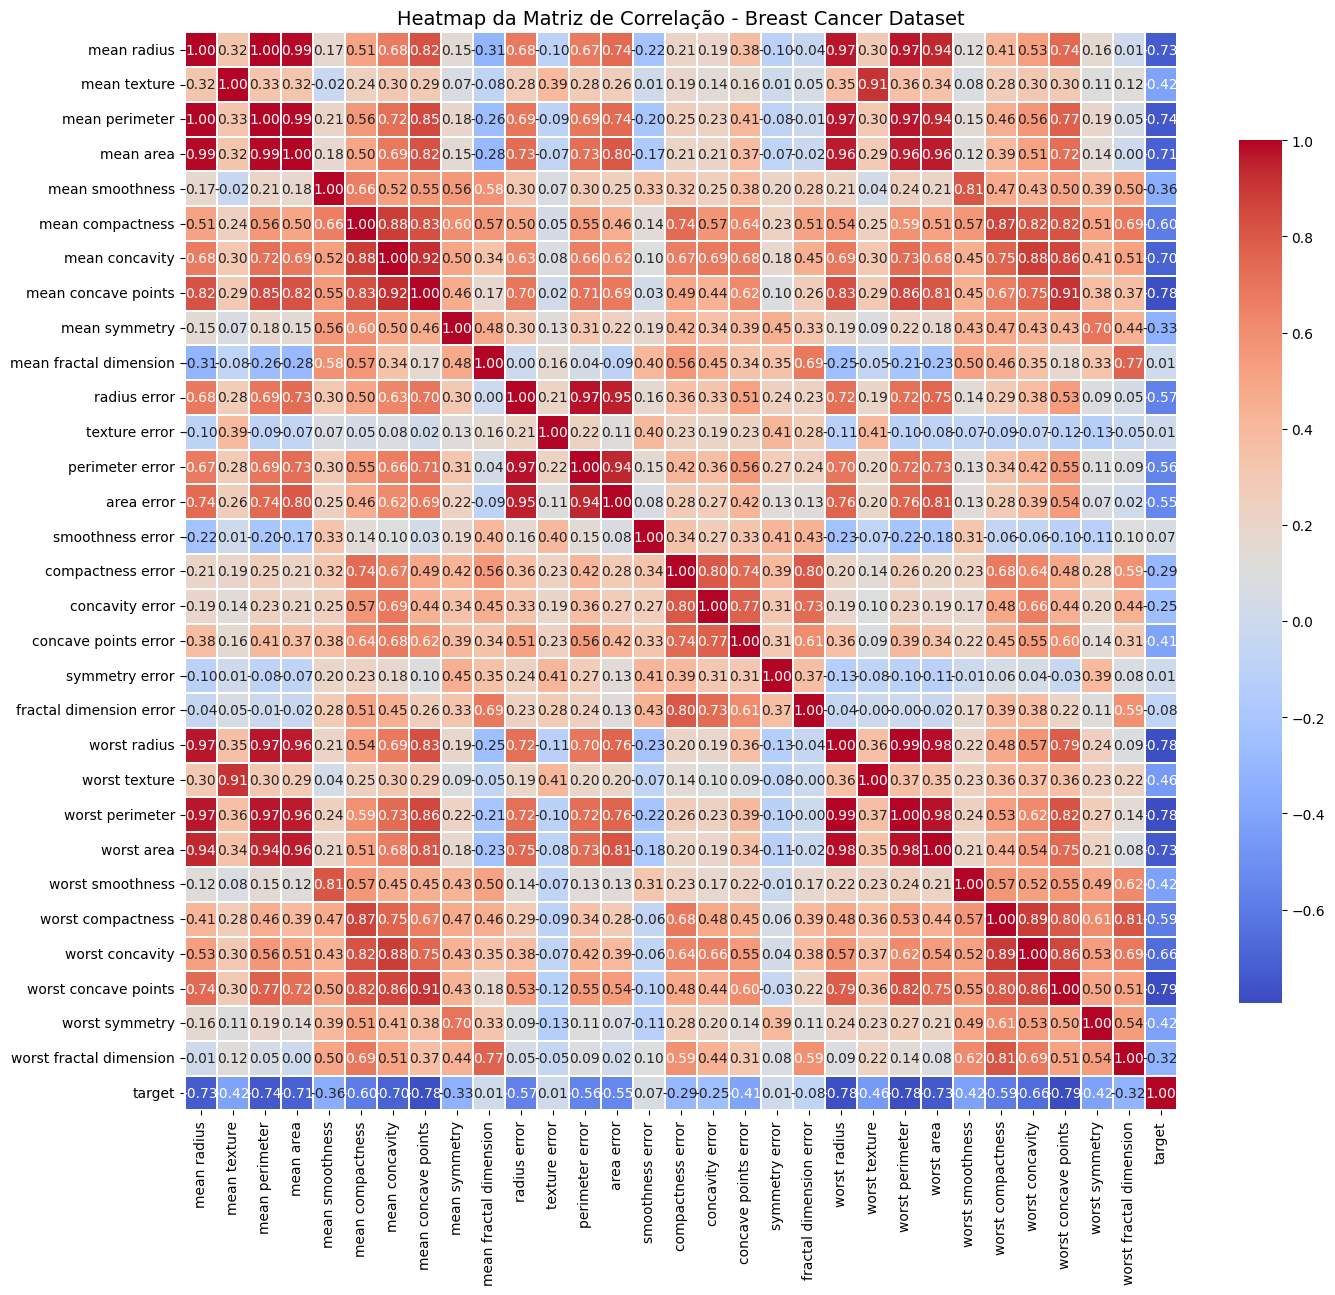

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a matriz de correlação
corr_matrix = df_cancer.corr(numeric_only=True)

# Definir o tamanho do gráfico
plt.figure(figsize=(16, 14))

# Plotar o heatmap
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",          # Paleta de cores
    annot=True,               # MOSTRA os valores no mapa
    fmt=".2f",                # Duas casas decimais
    linewidths=0.3,           # Linhas divisórias
    cbar_kws={"shrink": 0.8}  # Ajuste da barra lateral de cores
)

plt.title("Heatmap da Matriz de Correlação - Breast Cancer Dataset", fontsize=14)
plt.show()


5. Análise Bivariada (Features Selecionadas vs. Target):

Para as duas features selecionadas, criei boxplots mostrando a
distribuição de cada feature para cada classe do target (maligno vs. benigno).

/tmp/ipython-input-259205355.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y=feature, data=df_cancer, palette="coolwarm")
/tmp/ipython-input-259205355.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y=feature, data=df_cancer, palette="coolwarm")


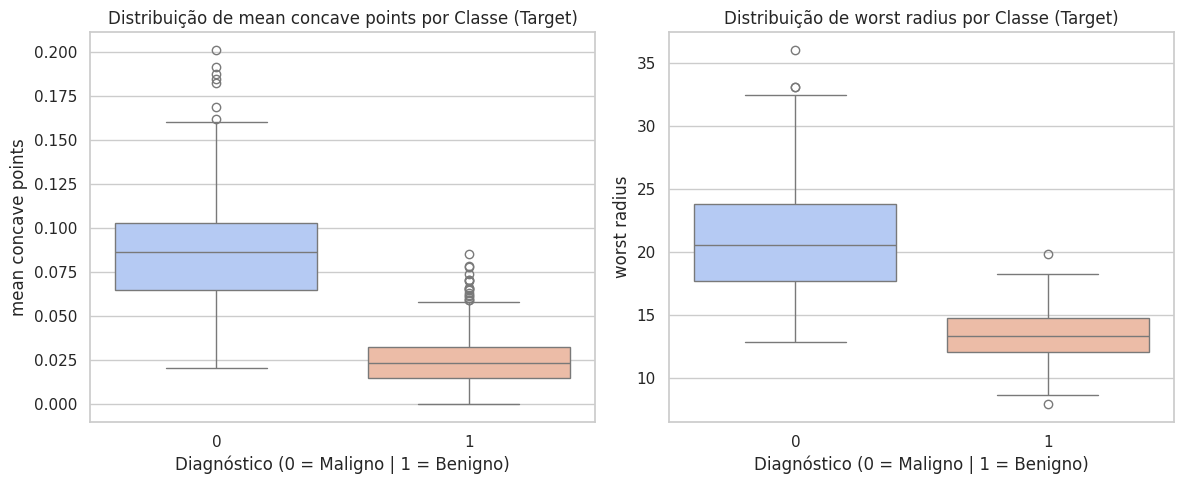

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir estilo dos gráficos
sns.set(style="whitegrid")

# Lista de features selecionadas
features_selecionadas = ["mean concave points", "worst radius"]

# Criar gráficos lado a lado
plt.figure(figsize=(12, 5))

for i, feature in enumerate(features_selecionadas):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x="target", y=feature, data=df_cancer, palette="coolwarm")
    plt.title(f"Distribuição de {feature} por Classe (Target)")
    plt.xlabel("Diagnóstico (0 = Maligno | 1 = Benigno)")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()




Com base nos boxplots das variáveis:

**mean concave points**

Os valores são significativamente maiores em tumores malignos (target = 0).

Os intervalos interquartis (caixas) das classes quase não se sobrepõem, indicando uma separação clara.

Isso mostra que a concavidade média das bordas celulares é um bom indicativo de malignidade.

**worst radius**

Também apresenta valores bem mais altos nos tumores malignos, e baixa sobreposição entre as classes.

Ou seja, quanto maior o raio máximo observado nas células, maior a probabilidade de o tumor ser maligno.

#Etapa 2: Modelo Baseline (2 Features)

Preparação dos Dados (Baseline):
Foi construído um DataFrame X_base contendo apenas as duas features.
E defini *y* como a coluna target.

In [ ]:
# Definir as features selecionadas
features_selecionadas = ["mean concave points", "worst radius"]

# Criar DataFrame X_base apenas com essas features
X_base = df_cancer[features_selecionadas]

# Definir y como a variável alvo
y = df_cancer["target"]

# Exibir as 5 primeiras linhas
print("DataFrame X_base:")
print(X_base.head())

print("\nVetor y (target):")
print(y.head())


DataFrame X_base:
   mean concave points  worst radius
0              0.14710         25.38
1              0.07017         24.99
2              0.12790         23.57
3              0.10520         14.91
4              0.10430         22.54

Vetor y (target):
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


Divida X_base e y em conjuntos de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

# Divisão em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X_base, y,
    test_size=0.2,         # 20% dos dados para teste
    random_state=42,       # garante reprodutibilidade
    stratify=y             # mantém proporção das classes
)

# Exibir dimensões resultantes
print("Dimensões do conjunto de treino:", X_train.shape)
print("Dimensões do conjunto de teste:", X_test.shape)


Dimensões do conjunto de treino: (455, 2)
Dimensões do conjunto de teste: (114, 2)


Treinamento e Avaliação (Baseline):

O modelo foi treinado um modelo LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Criar e treinar o modelo
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Foi realizada previsões de classe e de probabilidades

In [ ]:
# Previsões de classe
y_pred = modelo.predict(X_test)

# Previsões de probabilidade (para AUC e Curva ROC)
y_prob = modelo.predict_proba(X_test)[:, 1]  # probabilidade da classe "1" (benigno)


Foi calculada e exibida a confusion_matrix.

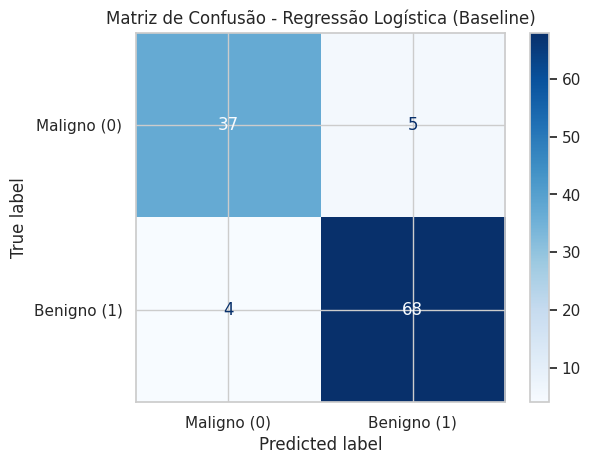

Matriz de confusão:
 [[37  5]
 [ 4 68]]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibir como gráfico
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Maligno (0)", "Benigno (1)"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão - Regressão Logística (Baseline)")
plt.show()

print("Matriz de confusão:\n", cm)


Foi calculada o classification_report. Exibindo a Acurácia, Recall , Precisão e F1-Score

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Relatório de métricas
print("Relatório de Classificação:\n")
print(classification_report(y_test, y_pred, target_names=["Maligno (0)", "Benigno (1)"]))

# Acurácia isolada
print("Acurácia total:", accuracy_score(y_test, y_pred))


Relatório de Classificação:

              precision    recall  f1-score   support

 Maligno (0)       0.90      0.88      0.89        42
 Benigno (1)       0.93      0.94      0.94        72

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114

Acurácia total: 0.9210526315789473


Foi calculada a AUC (roc_auc_score) usando as probabilidades do baseline.

In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.3f}")


AUC: 0.966


Gerando e exibindo a Curva ROC para o modelo baseline

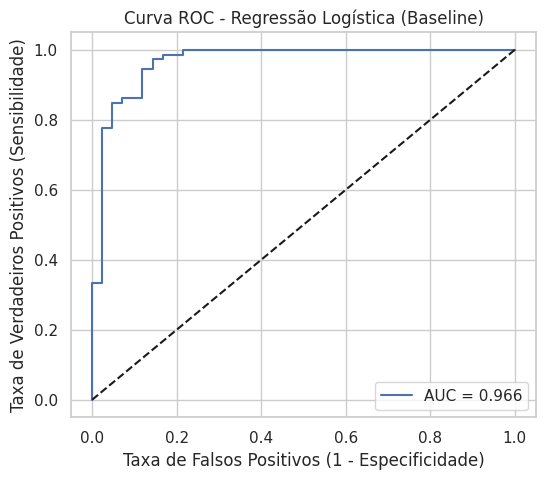

In [ ]:
from sklearn.metrics import roc_curve

# Calcular pontos da curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plotar curva ROC
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Curva ROC - Regressão Logística (Baseline)")
plt.xlabel("Taxa de Falsos Positivos (1 - Especificidade)")
plt.ylabel("Taxa de Verdadeiros Positivos (Sensibilidade)")
plt.legend(loc="lower right")
plt.show()


#Etapa 3: Modelo Melhorado (Todas Features)

Preparação dos Dados (Melhorado):

Foi construído X_improved contendo todas as features originais.

In [ ]:
# Remover a coluna 'target' e manter todas as outras
X_improved = df_cancer.drop(columns=["target"])

# Reaproveitar o vetor y já criado anteriormente
y = df_cancer["target"]

# Visualizar as primeiras linhas
print("DataFrame X_improved:")
print(X_improved.head(3))
print("\nDimensões:", X_improved.shape)


DataFrame X_improved:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33            184.6   
1                 0.05667  ...         24.99          23.41            158.8   
2                 0.05999  ...         23.57          25.53            152.5   

   worst area  worst smoothness  worst compactness 

Dividindo X_improved e y em conjuntos de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

# Divisão em treino (80%) e teste (20%)
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(
    X_improved, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Exibir dimensões resultantes
print("Dimensões do conjunto de treino:", X_train_imp.shape)
print("Dimensões do conjunto de teste:", X_test_imp.shape)


Dimensões do conjunto de treino: (455, 30)
Dimensões do conjunto de teste: (114, 30)


Treinamento e Avaliação (Melhorado):

O modelo foi treinado um novo modelo LogisticRegression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Padronizar as features (média = 0, desvio padrão = 1)
scaler = StandardScaler()
X_train_imp_scaled = scaler.fit_transform(X_train_imp)
X_test_imp_scaled = scaler.transform(X_test_imp)

# Criar e treinar o modelo de regressão logística
modelo_melhorado = LogisticRegression(max_iter=2000)
modelo_melhorado.fit(X_train_imp_scaled, y_train_imp)


LogisticRegression(max_iter=2000)

Fazendo previsões de classe e de probabilidades

In [ ]:
# Previsões de classe
y_pred_imp = modelo_melhorado.predict(X_test_imp_scaled)

# Probabilidades (classe 1 = benigno)
y_prob_imp = modelo_melhorado.predict_proba(X_test_imp_scaled)[:, 1]


Exibindo a confusion_matrix para este modelo.

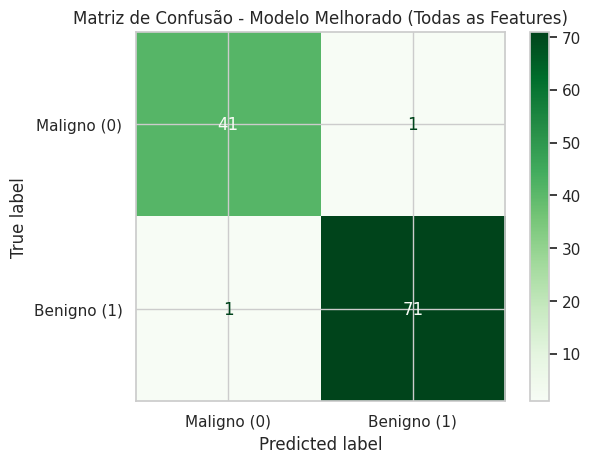

Matriz de Confusão:
 [[41  1]
 [ 1 71]]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Matriz de confusão
cm_imp = confusion_matrix(y_test_imp, y_pred_imp)

# Exibir graficamente
disp = ConfusionMatrixDisplay(confusion_matrix=cm_imp, display_labels=["Maligno (0)", "Benigno (1)"])
disp.plot(cmap="Greens")
plt.title("Matriz de Confusão - Modelo Melhorado (Todas as Features)")
plt.show()

print("Matriz de Confusão:\n", cm_imp)


Exibindo as métricas Acurácia, Recall
, Precisão, F1-Score

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print("Relatório de Classificação - Modelo Melhorado:\n")
print(classification_report(y_test_imp, y_pred_imp, target_names=["Maligno (0)", "Benigno (1)"]))

# Exibir acurácia isolada
print("Acurácia total:", accuracy_score(y_test_imp, y_pred_imp))


Relatório de Classificação - Modelo Melhorado:

              precision    recall  f1-score   support

 Maligno (0)       0.98      0.98      0.98        42
 Benigno (1)       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Acurácia total: 0.9824561403508771


Foi calculada AUC usando as probabilidades do modelo melhorado.

In [ ]:
from sklearn.metrics import roc_auc_score

auc_imp = roc_auc_score(y_test_imp, y_prob_imp)
print(f"AUC (Modelo Melhorado): {auc_imp:.3f}")


AUC (Modelo Melhorado): 0.995


Criando e plotando a Curva ROC para o modelo melhorado.

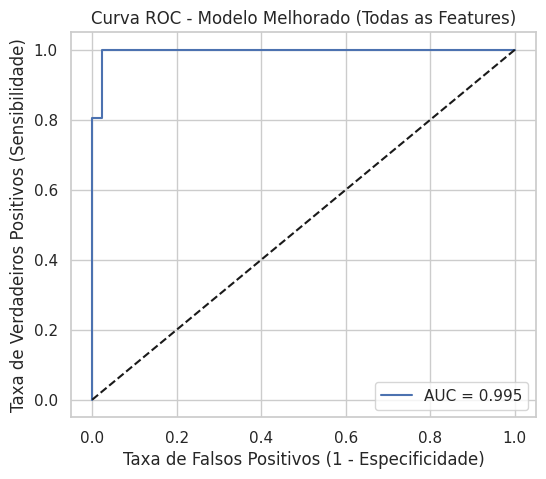

In [ ]:
from sklearn.metrics import roc_curve

# Calcular pontos da curva ROC
fpr_imp, tpr_imp, thresholds_imp = roc_curve(y_test_imp, y_prob_imp)

# Plotar curva ROC
plt.figure(figsize=(6,5))
plt.plot(fpr_imp, tpr_imp, label=f"AUC = {auc_imp:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Curva ROC - Modelo Melhorado (Todas as Features)")
plt.xlabel("Taxa de Falsos Positivos (1 - Especificidade)")
plt.ylabel("Taxa de Verdadeiros Positivos (Sensibilidade)")
plt.legend(loc="lower right")
plt.show()


#Etapa 4: Comparação de Modelos e Conclusão

Análise Comparativa de Métricas:

Foi gerado as Curvas ROC de ambos os modelos para comparação visual

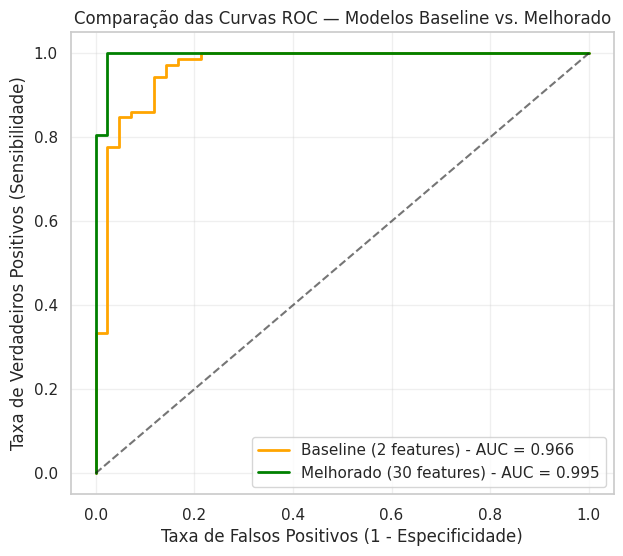

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Curva ROC do baseline
fpr_base, tpr_base, _ = roc_curve(y_test, y_prob)
auc_base = roc_auc_score(y_test, y_prob)

# Curva ROC do modelo melhorado
fpr_imp, tpr_imp, _ = roc_curve(y_test_imp, y_prob_imp)
auc_imp = roc_auc_score(y_test_imp, y_prob_imp)

# Plotagem comparativa
plt.figure(figsize=(7,6))
plt.plot(fpr_base, tpr_base, label=f"Baseline (2 features) - AUC = {auc_base:.3f}", color="orange", linewidth=2)
plt.plot(fpr_imp, tpr_imp, label=f"Melhorado (30 features) - AUC = {auc_imp:.3f}", color="green", linewidth=2)
plt.plot([0,1], [0,1], 'k--', alpha=0.6)
plt.title("Comparação das Curvas ROC — Modelos Baseline vs. Melhorado")
plt.xlabel("Taxa de Falsos Positivos (1 - Especificidade)")
plt.ylabel("Taxa de Verdadeiros Positivos (Sensibilidade)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


A inclusão de mais features melhorou a generalização e a sensibilidade do modelo, reduzindo a chance de falsos negativos (diagnosticar um tumor maligno como benigno).

-O modelo melhorado (com todas as 30 features) é o mais confiável

A inclusão de todas as features aumentou significativamente a AUC, Recall e F1-score, tornando o modelo mais sensível, mais confiável e mais adequado para apoio a diagnósticos médicos, onde errar por omissão (falso negativo) é o erro mais grave.

## Conclusões e Próximos Passos

A comparação evidenciou que a utilização de um conjunto mais completo de variáveis melhora o desempenho do modelo.

**Possíveis extensões:**
- Avaliação de outras métricas sensíveis ao contexto médico
- Teste de modelos não lineares
- Análise mais aprofundada de importância das variáveis